In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotnine as p9

from lib.lib import Import_data

path = Import_data()

c:\Users\rasmu\OneDrive\Skrivebord\TMA4851\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\rasmu\.cache\kagglehub\datasets\arashnic\earthquake-magnitude-damage-and-impact\versions\6


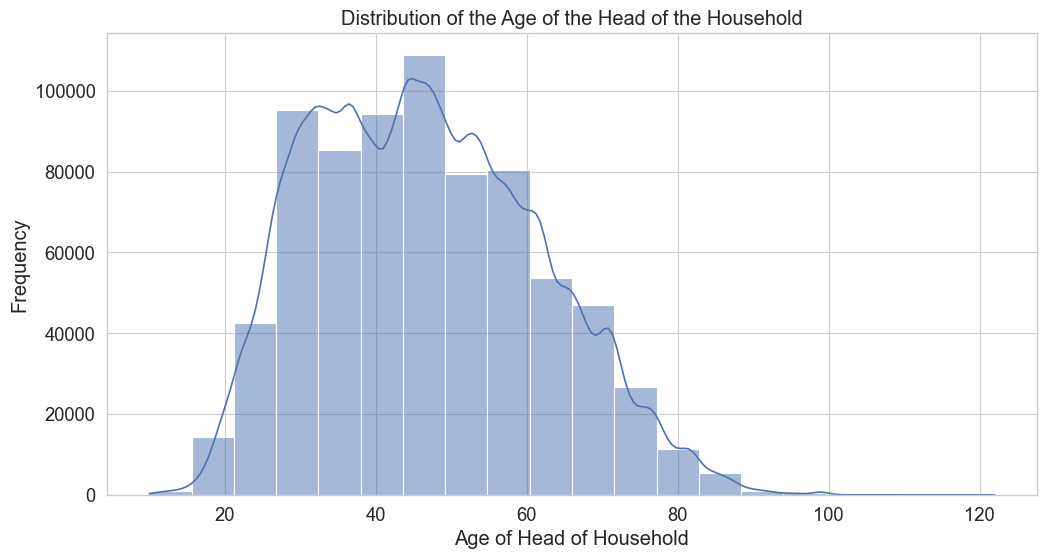

In [3]:
# get kaggle dataset from cache
df = pd.read_csv(path + "/csv_household_demographics.csv")
df = df.dropna()
df = df.drop_duplicates()

# 
sns.set_theme(style="whitegrid")
sns.set_context("paper", font_scale=1.5)

# Plotting the distribution of the age of the head of the household
plt.figure(figsize=(12, 6))
sns.histplot(df['age_household_head'], bins=20, kde=True)
plt.title('Distribution of the Age of the Head of the Household')
plt.xlabel('Age of Head of Household')
plt.ylabel('Frequency')
plt.show()